<a href="https://colab.research.google.com/github/RayOfLight07/Elements_of_AI_ML/blob/main/Experiment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implemention of Dimensionality reduction using Principal Component Analysis (PCA) method.


# Data Input and Standardization

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data as a NumPy array
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2.0, 1.6],
                 [1.0, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# Step 1: Standardize the data (mean = 0, variance = 1)
data_meaned = data - np.mean(data, axis=0)

# Output the standardized data
print("Standardized Data:\n", data_meaned)

Standardized Data:
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


# Covariance Matrix

In [8]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_meaned, rowvar=False)

# Output the covariance matrix
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


# Eigenvalues and Eigenvectors

In [9]:
# Step 3: Calculate eigenvalues and eigenvectors separately
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Output the eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [0.0490834  1.28402771]
Eigenvectors:
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


# Sorting Eigenvalues and Eigenvectors

In [10]:
# Step 4: Sort eigenvalues in descending order, and get the indices
sorted_index = np.argsort(eigenvalues)[::-1]

# Step 5: Re-arrange eigenvalues and eigenvectors based on the sorted indices
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Output the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [1.28402771 0.0490834 ]
Sorted Eigenvectors:
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


# Select Principal Components

In [11]:
# Step 6: Select the top k eigenvectors (for example, k=2 here)
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, :n_components]

# Output the selected principal components (eigenvectors)
print(f"Top {n_components} Principal Components (Eigenvectors):\n", eigenvector_subset)


Top 2 Principal Components (Eigenvectors):
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


# Project the Data

In [12]:
# Step 7: Project the original data onto the new feature space (principal components)
pca_data = np.dot(data_meaned, eigenvector_subset)

# Output the projected data (new transformed data)
print("Projected Data (PCA Result):\n", pca_data)


Projected Data (PCA Result):
 [[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


# Visualization

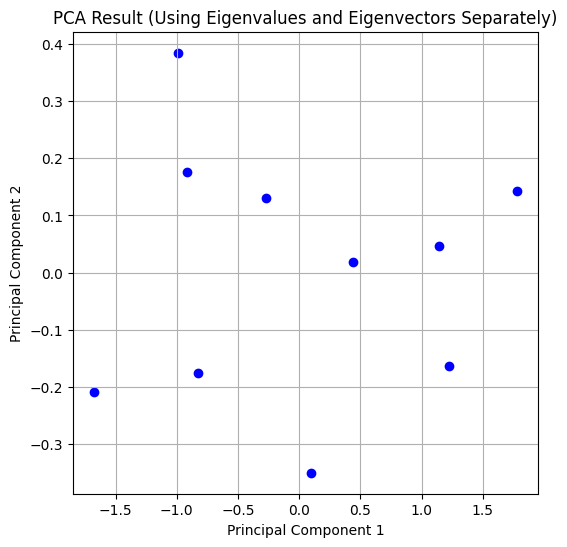

In [13]:
# Step 8: Visualize the transformed data
plt.figure(figsize=(6, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], color='blue', label='Data points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (Using Eigenvalues and Eigenvectors Separately)')
plt.grid(True)
plt.show()

# Explained Variance

In [14]:
# Step 9: Print the explained variance (how much variance each component captures)
explained_variance = sorted_eigenvalues / np.sum(eigenvalues)
print(f"Explained Variance Ratio: {explained_variance[:n_components]}")

Explained Variance Ratio: [0.96318131 0.03681869]
